In [2]:
import gzip
import math
import numpy as np
import string
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
f = gzip.open("renttherunway_final_data.json.gz")
dataset = []
for l in f:
    dataset.append(json.loads(l))

In [4]:
# loading and processing dataset

df = pd.DataFrame(dataset)

# dropping all rows with null values

df = df.dropna()

# converting necessary columns to numeric format

df['weight'] = pd.to_numeric(df['weight'].str.split('lbs').str[0])
df['age'] = pd.to_numeric(df['age'])
df['rating'] = pd.to_numeric(df['rating'])
df['size'] = pd.to_numeric(df['size'])

# for example, 5 ft 8 inches will be represented as 5.08, 5'11" will be 5.11

height_feet = pd.to_numeric(df['height'].str.split("'").str[0])
ser = df['height'].str.split().str[1]
height_inches = pd.to_numeric(ser.str.split('"').str[0])
df['height'] = height_feet + (height_inches / 100)

# drop user id, item id, review date

df = df.drop(columns = ['user_id', 'item_id', 'review_date'])

In [5]:
df

,fit,bust size,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
0,fit,34d,137,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,5.08,14,28
1,fit,34b,132,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,5.06,12,36
3,fit,34c,135,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,5.05,8,34
4,fit,34b,145,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,5.09,12,27
5,fit,32b,138,8,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,5.08,8,45
...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140,10,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,5.09,8,42
192540,fit,32c,100,10,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,5.01,4,29
192541,fit,36a,135,6,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,5.08,8,31
192542,fit,36c,165,10,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,5.06,16,31


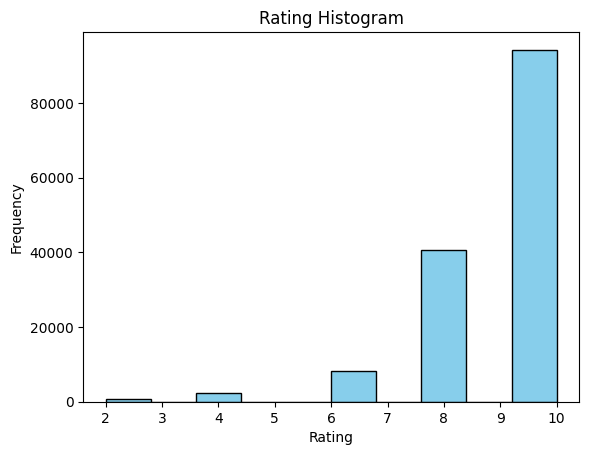

In [6]:
plt.hist(df['rating'], color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Histogram')
plt.show()

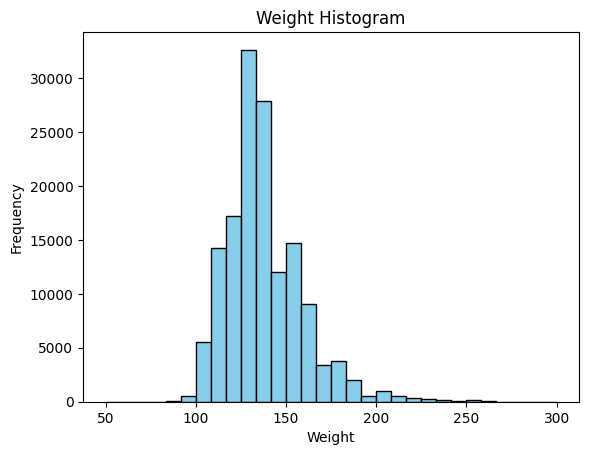

In [7]:
plt.hist(df['weight'], bins = 30, color='skyblue', edgecolor='black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight Histogram')
plt.show()

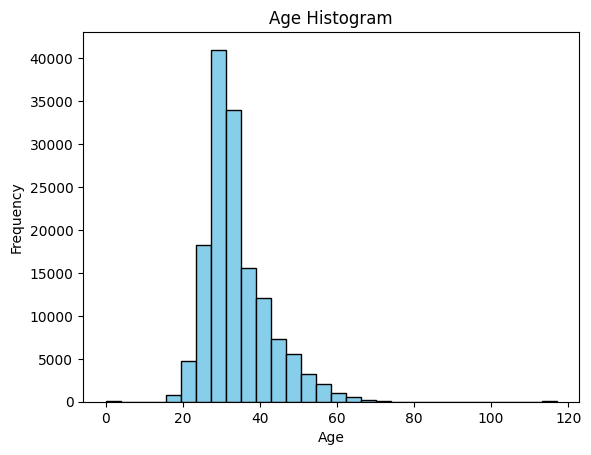

In [8]:
plt.hist(df['age'], bins = 30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.show()

In [9]:
df['age'].max()

np.int64(117)

In [10]:
df['body type'].unique()

array(['hourglass', 'straight & narrow', 'pear', 'athletic', 'full bust',
       'petite', 'apple'], dtype=object)

In [11]:
df['category'].unique()

array(['romper', 'gown', 'dress', 'sheath', 'leggings', 'sweater',
       'jacket', 'shirtdress', 'jumpsuit', 'shift', 'top', 'shirt',
       'mini', 'skirt', 'maxi', 'pants', 'suit', 'coat', 'blouse',
       'trench', 'cape', 'bomber', 'blazer', 'vest', 'duster', 'ballgown',
       'tank', 'poncho', 'frock', 'tunic', 'cardigan', 'down', 'culottes',
       'midi', 'legging', 'print', 'pant', 'knit', 'culotte',
       'sweatshirt', 'peacoat', 'trouser', 'kaftan', 'overalls', 'jogger',
       'tee', 'combo', 'henley', 'blouson', 'pullover', 'turtleneck',
       'trousers', 'overcoat', 'hoodie', 't-shirt', 'caftan', 'tight',
       'kimono', 'cami', 'for', 'crewneck', 'skirts', 'parka',
       'buttondown', 'skort', 'sweatershirt', 'jeans', 'sweatpants'],
      dtype=object)

(array([4.1000e+01, 0.0000e+00, 1.5500e+02, 5.4000e+03, 3.7469e+04,
        5.5771e+04, 2.2557e+04, 1.2347e+04, 7.0840e+03, 3.7580e+03,
        1.2970e+03, 3.8700e+02, 4.2000e+01, 4.0000e+00, 4.0000e+00,
        1.8000e+01, 3.0000e+00, 1.0000e+00, 1.0000e+00, 4.2000e+01]),
 array([  0.  ,   5.85,  11.7 ,  17.55,  23.4 ,  29.25,  35.1 ,  40.95,
         46.8 ,  52.65,  58.5 ,  64.35,  70.2 ,  76.05,  81.9 ,  87.75,
         93.6 ,  99.45, 105.3 , 111.15, 117.  ]),
 <BarContainer object of 20 artists>)

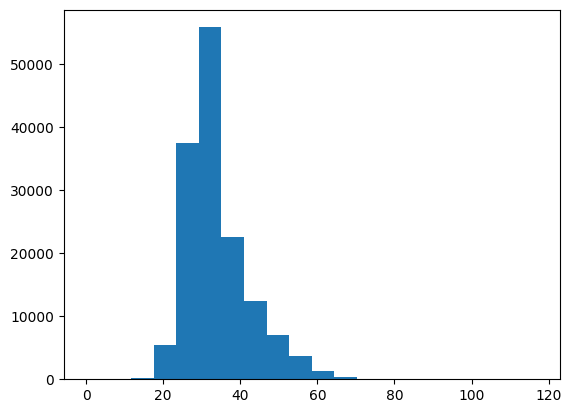

In [12]:
plt.hist(df['age'], bins = 20)

(array([ 1029.,     0.,     0.,     0., 78105., 65859.,     0.,     0.,
            0.,  1388.]),
 array([4.06, 4.26, 4.46, 4.66, 4.86, 5.06, 5.26, 5.46, 5.66, 5.86, 6.06]),
 <BarContainer object of 10 artists>)

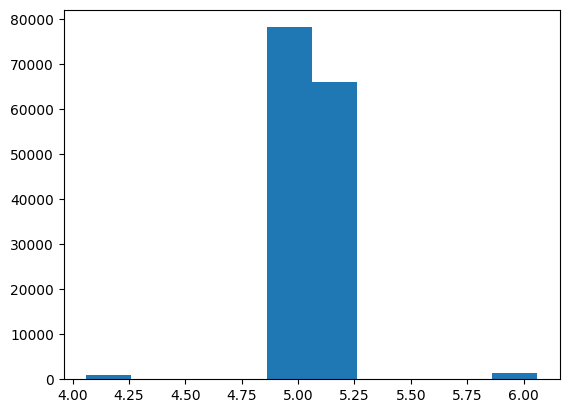

In [13]:
plt.hist(df['height'])

In [14]:
# percentage of data reported as fit

print("Percentage of items reported as fit: " + str(df[df['fit'] == 'fit'].shape[0] / df.shape[0]))
print("Percentage of items reported as small: " + str(df[df['fit'] == 'small'].shape[0] / df.shape[0]))
print("Percentage of items reported as large: " + str(df[df['fit'] == 'large'].shape[0] / df.shape[0]))

Percentage of items reported as fit: 0.7359766636380405
Percentage of items reported as small: 0.1340474515135161
Percentage of items reported as large: 0.12997588484844344


In [15]:
df['fit'].unique()

array(['fit', 'small', 'large'], dtype=object)

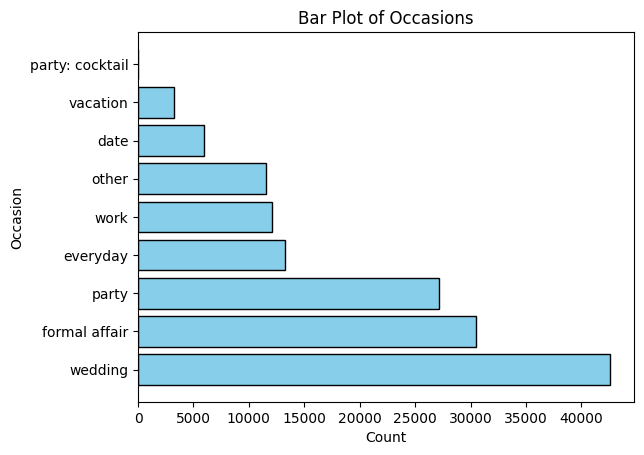

In [21]:
category_counts = df['rented for'].value_counts()

# Plot horizontal bar plot
plt.barh(category_counts.index, category_counts.values, color = 'skyblue', edgecolor = 'black')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Occasion')
plt.title('Bar Plot of Occasions')

# Show the plot
plt.show()